# TensorFlow/ Keras
- TensorFlow 와 Keras 는 ML 모델을 개발하고 학습시키는 데 도움이 되는 핵심 오픈소스 라이브러리 이다. 
- Keras 는 사용자가 TensorFlow 를 좆ㅁ 더 쉽고 편하게 사용할 수 있게 해주는 high level API 를 제공한다. 
- TensorFlow 2.x 에서는 Keras 를 딥러닝의 공식 API 로 채택, Keras 는 TensorFlow 내의 하나의 framework 으로 개발되고 있다

# TensorFlow / Keras Basic

### TensorFlow / Keras import

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__ )
print(keras.__version__)

2.7.0
2.7.0


### TensorFlow / Keras 맛보기

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

# MNIST Dataset Download 
mnist = keras.datasets.mnist

(x_train, y_train) , (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0 , x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# Model 생성, compile
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape = (28, 28)), # flatten 시켜준다 # input
                                    tf.keras.layers.Dense(units = 128 , activation = "relu"), # Dense Layer 
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation = "softmax") 
])

model.compile(optimizer = "adam", 
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"]) 

In [5]:
# Training / Evaluation

model.fit(x_train, y_train, epochs = 10)
model.evaluate(x_test, y_test) # [0.06833620369434357, 0.982200026512146] : loss , accuracy

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3011 - accuracy: 0.9132
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1460 - accuracy: 0.9566
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1103 - accuracy: 0.9664
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0913 - accuracy: 0.9722
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0758 - accuracy: 0.9768
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0671 - accuracy: 0.9790
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0588 - accuracy: 0.9807
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0516 - accuracy: 0.9838
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0493 - accuracy: 0.9837
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.0683 

[0.06833620369434357, 0.982200026512146]

- 데이터 탐색

In [6]:
idx = np.random.randint(len(x_train)) # index
image = x_train[idx] 

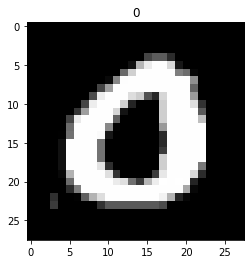

In [8]:
plt.imshow(image, cmap = "gray") # imshow = image show , cmap = color map
plt.title(y_train[idx])
plt.show()

- 내가 쓴 손글씨로 Test 해보기. 
- Colab 을 쓰는 경우에는 아래 cell 을 실행하면 파일을 업로드할 수 있다. 
- 그림판과 같은 도구를 이용하여 손으로 숫자를 쓴 다음 파일로 저장하고 업로드 한다. 
- 이 때 파일명은 image.png 로 한다.

In [9]:
# 파일을 업로드할 수 있는 소스 코드

import os 
from PIL import Image 
from google.colab import files 

uploaded = files.upload()

for fn in uploaded.keys() :
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn , length = len(uploaded[fn])))

Saving image.png to image.png
User uploaded file "image.png" with length 437 bytes


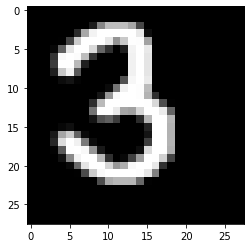

In [21]:
# image file 의 경로 설정
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, "image.png") # 현재 디렉토리 + image 파일 이름
# image file 읽기
cur_img = Image.open(img_path)
# 28 X 28 사이즈로 resize
cur_img = cur_img.resize((28, 28))
# array 로 변환
image = np.asarray(cur_img)

# color image 일 경우 RGB 평균값으로 gray scale 로 변경 
# 예외 처리 
# try 블록 수행 중 오류가 발생하면 except 블록이 수행된다. 하지만 try 블록에서 오류가 발생하지 않는다면 except 블록은 수행되지 않는다.

try :
    image = np.mean(image, axis = 2)
except : 
    pass
# upload 한 image 는 흰 배경에서 검은 글씨로 되어 있으므로, MNIST data 와 같이 검은 배경에 흰 글씨로 변경 
image = np.abs(255- image)
# MNIST 와 동일하게 data preprocessing (255 로 나눠줌) => scaling
image = image.astype(np.float32) / 255
# 화면에 출력하여 확인 
plt.imshow(image, cmap = "gray")
plt.show()
